# Check atmospheric simulation
=======================================================================

- Sylvie Dagoret-Campagne
- update 05 April 2018


In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np

In [171]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [173]:
path='simspectra'
filename='atmsim_20170530_210.fits'

In [174]:
#path='test'
#filename='atmsim_20170530_213.fits' 

In [175]:
fullfilename=os.path.join(path,filename)

In [176]:
hdu= fits.open(fullfilename) 

In [177]:
hdr=hdu[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  804                                                  
NAXIS2  =                   28                                                  
ATMSIM  = 'libradtran'                                                          
SIMVERS = '2.0.1   '                                                            
DATAFILE= 'reduc_20170530_210.fits'                                             
SIMUFILE= 'atmsim_20170530_210.fits'                                            
AIRMASS =                1.101                                                  
PRESSURE=                  782                                                  
TEMPERAT=                  9.5                                                  
NBATMPTS=                   

In [178]:
data=hdu[0].data

# Decode indexes

In [179]:
filenamedata=hdr['DATAFILE']
filenamesim=hdr['SIMUFILE']
            
am=hdr['AIRMASS']
P=hdr['PRESSURE']
T=hdr['TEMPERAT']
NB_ATM_Points=hdr['NBATMPTS']
        
NB_AER_POINTS=hdr['NBAERPTS']
AER_MIN=hdr['AERMIN']
AER_MAX=hdr['AERMAX']

NB_PWV_POINTS=hdr['NBPWVPTS']
PWV_MIN=hdr['PWVMIN']
PWV_MAX=hdr['PWVMAX'] 
        
NB_OZ_POINTS=hdr['NBOZPTS']
OZ_MIN=hdr['OZMIN'] 
OZ_MAX=hdr['OZMAX']  


NBWLBINS=hdr['NBWLBIN']
WLMIN=hdr['WLMIN']
WLMAX=hdr['WLMAX']
    
index_atm_count=hdr['IDX_CNT']
index_atm_aer=hdr['IDX_AER']
index_atm_pwv=hdr['IDX_PWV']
index_atm_oz=hdr['IDX_OZ']
index_atm_data=hdr['IDX_DATA']

# Wavelengths

In [180]:
WL=data[0,index_atm_data:]

In [181]:
WL.shape

(800,)

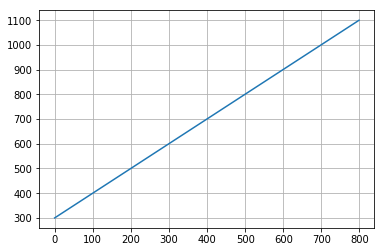

In [182]:
plt.plot(WL)
plt.grid()

# check aerosols

In [183]:
indexes_aer=np.where(np.logical_and(data[:,index_atm_pwv]==5.0, data[:,index_atm_oz]==300.))[0]

In [184]:
aer_values=data[indexes_aer,index_atm_aer]
aer_values

array([0.  , 0.05, 0.1 ])

In [185]:
aer_data=data[indexes_aer,index_atm_data:]

In [186]:
aer_data.shape

(3, 800)

Text(0.5,1,u'Aerosols Variation')

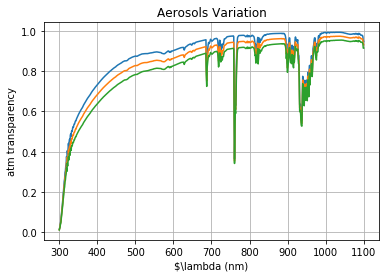

In [187]:
for idx,aer in np.ndenumerate(aer_values):
    plt.plot(WL, aer_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda (nm)")
plt.ylabel("atm transparency")
plt.title("Aerosols Variation")

# Check precipitable water vapor

In [188]:
indexes_pwv=np.where(np.logical_and(data[:,index_atm_aer]==0, data[:,index_atm_oz]==300.))[0]

In [189]:
pwv_values=data[indexes_pwv,index_atm_pwv]
pwv_values

array([ 0.,  5., 10.])

In [190]:
pwv_data=data[indexes_pwv,index_atm_data:]

Text(0.5,1,u'PWV Variation')

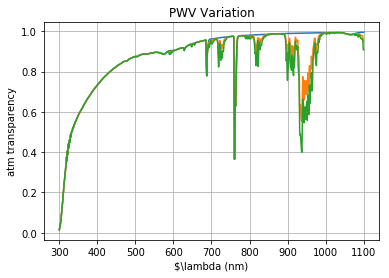

In [191]:
for idx,pwv in np.ndenumerate(pwv_values):
    plt.plot(WL, pwv_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda (nm)")
plt.ylabel("atm transparency")
plt.title("PWV Variation")

## Check Ozone

In [192]:
indexes_oz=np.where(np.logical_and(data[:,index_atm_aer]==0, data[:,index_atm_pwv]==5.))[0]

In [193]:
oz_values=data[indexes_oz,index_atm_oz]
oz_values

array([200., 250., 300.])

In [194]:
oz_data=data[indexes_oz,index_atm_data:]

Text(0.5,1,u'Ozone Variation')

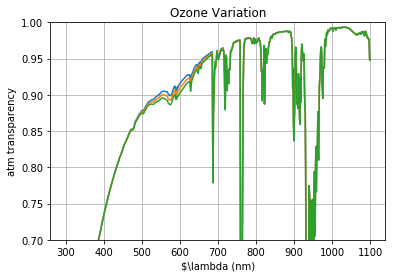

In [195]:
for idx,oz in np.ndenumerate(oz_values):
    plt.plot(WL, oz_data[idx[0],:])
plt.grid()
plt.xlabel("$\lambda (nm)")
plt.ylabel("atm transparency")
plt.ylim(0.7,1.0)
plt.title("Ozone Variation")